## Importing Libraries

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## Loading Data 

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Performing EDA 

In [3]:
df.shape

(6362620, 11)

In [4]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Dataset doesn't contain any missing values

<AxesSubplot:>

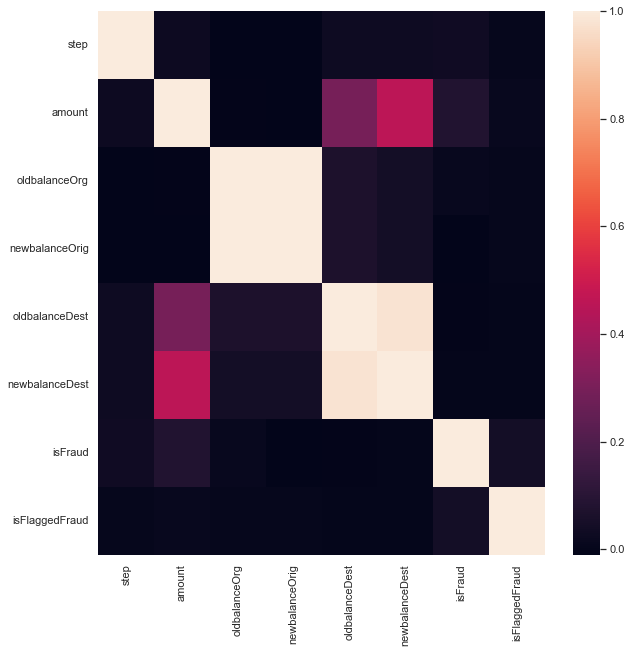

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=False)

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

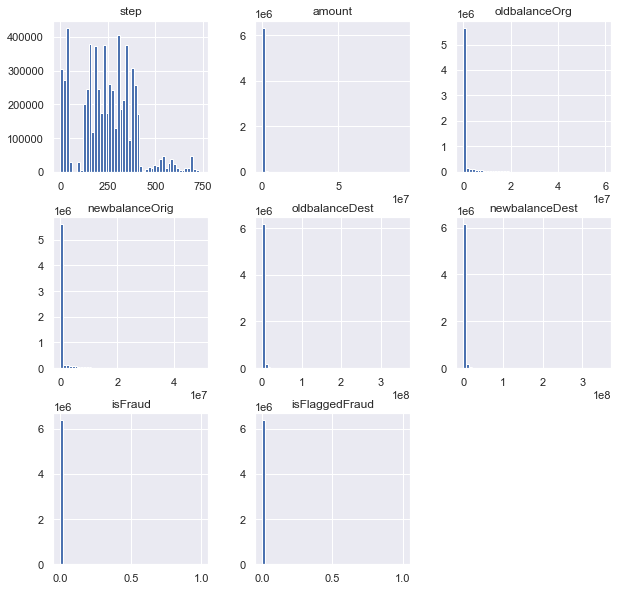

In [8]:
df.hist(bins=50,figsize=(10,10))

## Outlier Detection  

In [9]:
class outliers:
    def out(c_name):
        plt.boxplot(df[c_name])
        plt.show()
        length = len(c_name)
        df["col_zscore"] = (df[c_name] - df[c_name].mean())/df[c_name].std()

        for i in range(length):
            outl = [o for o in df["col_zscore"] if(o > 3 or 0 < -3)]
        outliers = pd.DataFrame(outl)
        print("outliers:")
        return outliers

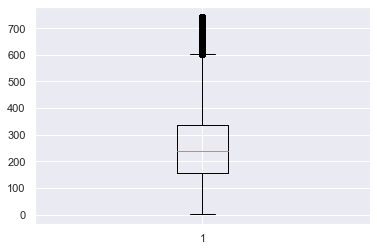

outliers:


,0
0,3.004264
1,3.004264
2,3.004264
3,3.004264
4,3.004264


In [10]:
ctnm = outliers.out("step")
ctnm.head()

In [11]:
df_corr_matrix = df.corr()
df_corr_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,col_zscore
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,1.000000
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.022373
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.010058
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.010299
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.027665
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.025888
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.031578
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.003277
col_zscore,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,1.000000


## Converting catergorical to numeric 

In [20]:
class PreProctnm: 
    
    @staticmethod
#function to convert category caL  data  to  nurneri ca L  data  us ing  Labe L Encoder
    def cat_to_num(a, df): 
        length = len(a) 
        dscpy = df
        for i in range(length):
            dscpy.iloc[:,a[i]] = le.fit_transform(df.iloc[:,a[i]]) 
        return dscpy

In [21]:
#converting   the  22th   row   i  . e   depos i I   type   (cotegori caL   data)   to   nu/r beri c
ctnm = PreProctnm.cat_to_num([1], df)
ctnm.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,col_zscore
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-1.703041
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1.703041
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-1.703041
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-1.703041
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-1.703041


In [27]:
#converting   the  22th   row   i  . e   depos i I   type   (cotegori caL   data)   to   nu/r beri c
ctnm = PreProctnm.cat_to_num([6], df)
ctnm.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,col_zscore
0,1,3,9839.64,C1231006815,170136.0,160296.36,1662094,0.0,0.0,0,0,-1.703041
1,1,3,1864.28,C1666544295,21249.0,19384.72,1733924,0.0,0.0,0,0,-1.703041
2,1,4,181.00,C1305486145,181.0,0.00,439685,0.0,0.0,1,0,-1.703041
3,1,1,181.00,C840083671,181.0,0.00,391696,21182.0,0.0,1,0,-1.703041
4,1,3,11668.14,C2048537720,41554.0,29885.86,828919,0.0,0.0,0,0,-1.703041


In [32]:
#converting   the  22th   row   i  . e   depos i I   type   (cotegori caL   data)   to   nu/r beri c
ctnm = PreProctnm.cat_to_num([3], df)
ctnm.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,col_zscore
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,-1.703041
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,-1.703041
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,-1.703041
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,-1.703041
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,-1.703041


## Splitting Data 

In [33]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Applying Classification model

In [36]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('------------------------')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9996911649603465
------------------------
Confusion Matrix:
[[1270734     170]
 [    223    1397]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.86      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

